In [75]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torch.nn import functional as F

from sklearn.model_selection import train_test_split

In [137]:
def f(a, b):
    return torch.sin(torch.pi * a) * torch.cos(torch.pi * b)

# Number of points on each axis
num_points_first_axis = 200
num_points_second_axis = 100

# create a grid of points in torch
first_axes = torch.linspace(-1, 3, num_points_first_axis)
second_axes = torch.linspace(-0.5, 1.5, num_points_second_axis)

# split first axis into 25% test set and 75% training set
test_split = 0.25
x_train, x_test = train_test_split(first_axes, test_size=test_split, shuffle=False)

# create meshgrids, 1 for training one for testing using torch
xx_train, yy_train = torch.meshgrid(x_train, second_axes, indexing='ij')
xx_test, yy_test = torch.meshgrid(x_test, second_axes, indexing='ij')

# create features and targets directly in torch
features_train = torch.stack((xx_train.flatten(), yy_train.flatten()), dim=1)
targets_train = f(xx_train, yy_train).view(-1, 1)
features_test = torch.stack((xx_test.flatten(), yy_test.flatten()), dim=1)
targets_test = f(xx_test, yy_test).view(-1, 1)

# print shapes
print(f'features_train.shape: {features_train.shape}')
print(f'targets_train.shape: {targets_train.shape}')
print(f'features_test.shape: {features_test.shape}')
print(f'targets_test.shape: {targets_test.shape}')

features_train.shape: torch.Size([15000, 2])
targets_train.shape: torch.Size([15000, 1])
features_test.shape: torch.Size([5000, 2])
targets_test.shape: torch.Size([5000, 1])


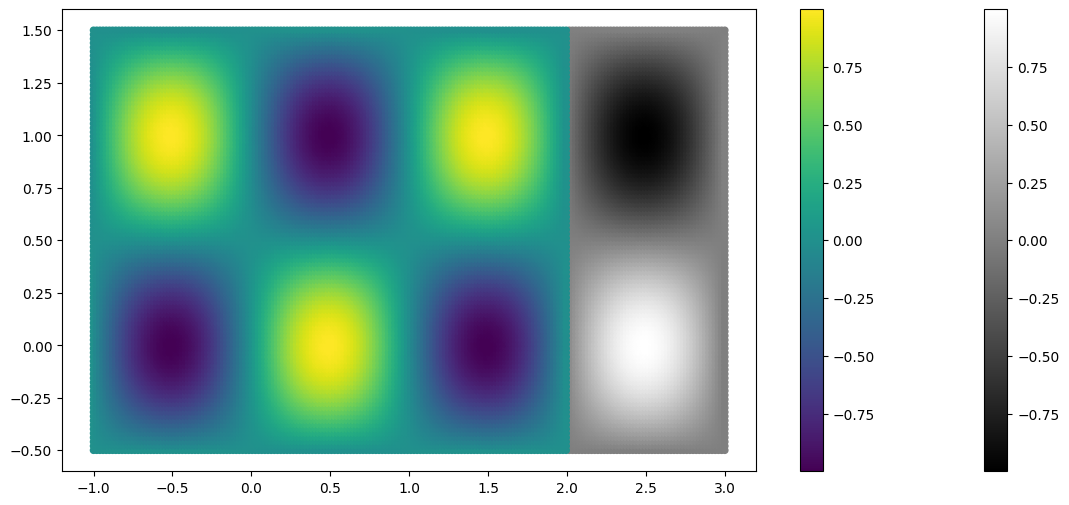

<Figure size 640x480 with 0 Axes>

In [153]:
# plot the data with colorbar
plt.figure(figsize=(14, 6), dpi=100)
plt.scatter(features_test[:, 0], features_test[:, 1], c=targets_test, s=20, cmap='gray')
plt.colorbar()
plt.scatter(features_train[:, 0], features_train[:, 1], c=targets_train, s=20, cmap='viridis')
plt.colorbar()
plt.show()
plt.tight_layout()


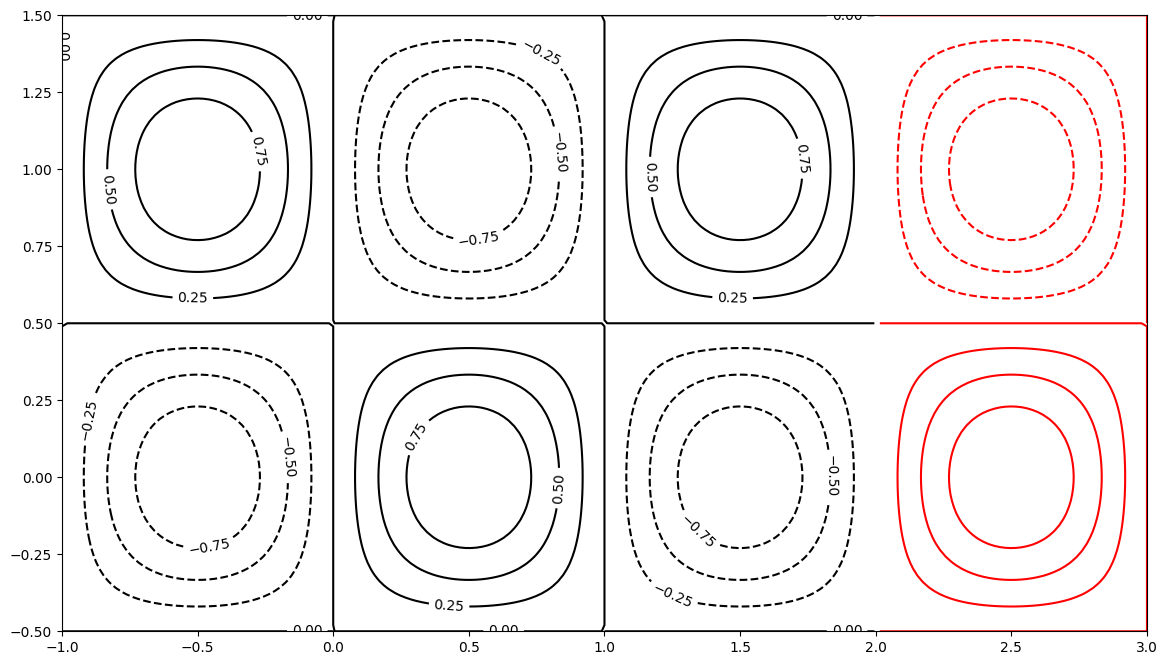

In [138]:
# contour plot with x_test and y_test
plt.rcParams['contour.negative_linestyle'] = 'dashed'
fig, ax = plt.subplots(figsize=(14, 8), dpi=100)
CS_train = ax.contour(xx_train, yy_train, targets_train.reshape(xx_train.shape), colors='black')
CS_test = ax.contour(xx_test, yy_test, targets_test.reshape(xx_test.shape), colors='red')
ax.clabel(CS_train, inline=1, fontsize=10)
plt.show()

In [139]:
num_features = 2
hidden_dim1 = 128
hidden_dim2 = 128
num_outputs = 1


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(num_features, hidden_dim1), 
            nn.ReLU(),
            nn.Linear(hidden_dim1, hidden_dim2),
            nn.ReLU(),
            nn.Linear(hidden_dim2, num_outputs)
        )
    
    def forward(self, x):
        return self.network(x)

In [140]:
# Instantiate the model
model = Net()

# Loss function
criterion = nn.MSELoss()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)


In [141]:
epochs = 4000
model.train()
for epoch in range(epochs):
    optimizer.zero_grad()           # Clear gradients for the next train
    output = model(features_train)         # Forward pass: Compute predicted y by passing x to the model
    loss = criterion(output, targets_train)# Compute loss
    loss.backward()                 # Backward pass: Compute gradient of the loss with respect to model parameters
    optimizer.step()                # Update weights
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')


Epoch 1/4000, Loss: 0.27415862679481506
Epoch 101/4000, Loss: 0.1942286193370819
Epoch 201/4000, Loss: 0.1544034779071808
Epoch 301/4000, Loss: 0.11574459075927734
Epoch 401/4000, Loss: 0.08533328771591187
Epoch 501/4000, Loss: 0.062133774161338806
Epoch 601/4000, Loss: 0.044175658375024796
Epoch 701/4000, Loss: 0.031136101111769676
Epoch 801/4000, Loss: 0.021720686927437782
Epoch 901/4000, Loss: 0.015082540921866894
Epoch 1001/4000, Loss: 0.010401585139334202
Epoch 1101/4000, Loss: 0.007365856319665909
Epoch 1201/4000, Loss: 0.005251334514468908
Epoch 1301/4000, Loss: 0.0037721621338278055
Epoch 1401/4000, Loss: 0.002723896875977516
Epoch 1501/4000, Loss: 0.0019861299078911543
Epoch 1601/4000, Loss: 0.0014646315248683095
Epoch 1701/4000, Loss: 0.0011055732611566782
Epoch 1801/4000, Loss: 0.0008535508532077074
Epoch 1901/4000, Loss: 0.0006747536826878786
Epoch 2001/4000, Loss: 0.0005455078207887709
Epoch 2101/4000, Loss: 0.0004494265012908727
Epoch 2201/4000, Loss: 0.000379670644178986

In [149]:
# Run the model on the train and test set to get predictions
with torch.no_grad():
    targets_train_pred = model(features_train).detach().numpy()
    targets_test_pred = model(features_test).detach().numpy()

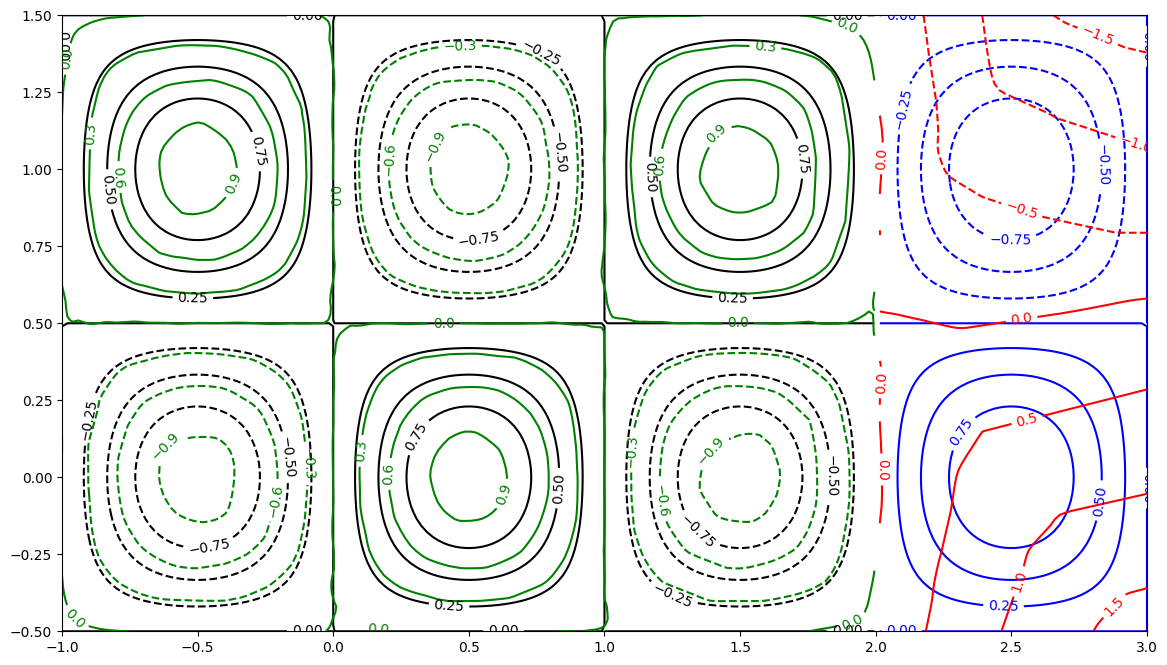

In [150]:
# contour plot with x_test and y_test
plt.rcParams['contour.negative_linestyle'] = 'dashed'
fig, ax = plt.subplots(figsize=(14, 8), dpi=100)
# train comparisons
CS_train = ax.contour(xx_train, yy_train, targets_train.reshape(xx_train.shape), colors='black')
CS_train_pred = ax.contour(xx_train, yy_train, targets_train_pred.reshape(xx_train.shape), colors='green')
# test comparisons
CS_test = ax.contour(xx_test, yy_test, targets_test.reshape(xx_test.shape), colors='blue')
CS_test_pred = ax.contour(xx_test, yy_test, targets_test_pred.reshape(xx_test.shape), colors='red')

ax.clabel(CS_train, inline=1, fontsize=10)
ax.clabel(CS_train_pred, inline=1, fontsize=10)
ax.clabel(CS_test, inline=1, fontsize=10)
ax.clabel(CS_test_pred, inline=1, fontsize=10)

plt.show()

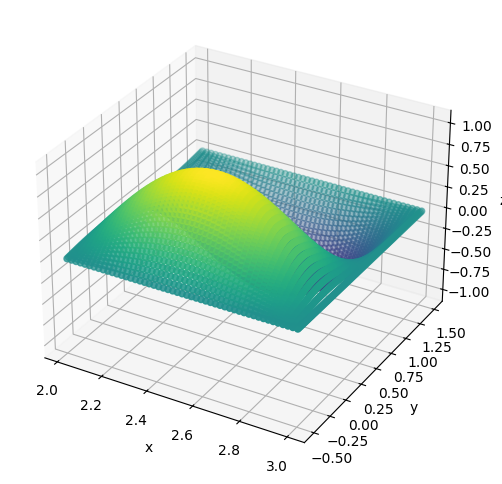

In [152]:
# plot 3d results from y_test and x_test
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 6), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features_test[:, 0], features_test[:, 1], targets_test, c=targets_test)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()
# plt.tight_layout()
